In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv(r"C:\Users\MSI\PycharmProjects\pythonProject\Machine Learning\UniAcco\bank.csv")
df

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
4516,"33;""services"";""married"";""secondary"";""no"";-333;..."
4517,"57;""self-employed"";""married"";""tertiary"";""yes"";..."
4518,"57;""technician"";""married"";""secondary"";""no"";295..."
4519,"28;""blue-collar"";""married"";""secondary"";""no"";11..."


In [3]:
df= pd.read_csv(r"C:\Users\MSI\PycharmProjects\pythonProject\Machine Learning\UniAcco\bank.csv",sep=";")

print(df)

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop(['day','month','poutcome','contact'], axis=1, inplace=True)

In [8]:
label_encoder = preprocessing.LabelEncoder()

df['default'] = label_encoder.fit_transform(df['default'])
df['default'].unique()
df['housing'] = label_encoder.fit_transform(df['housing'])
df['housing'].unique()
df['loan'] = label_encoder.fit_transform(df['loan'])
df['loan'].unique()
df['job'] = label_encoder.fit_transform(df['job'])
df['job'].unique()
df['marital'] = label_encoder.fit_transform(df['marital'])
df['marital'].unique()
df['education'] = label_encoder.fit_transform(df['education'])
df['education'].unique()

array([0, 1, 2, 3])

In [9]:
df

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,y
0,30,10,1,0,0,1787,0,0,79,1,-1,0,no
1,33,7,1,1,0,4789,1,1,220,1,339,4,no
2,35,4,2,2,0,1350,1,0,185,1,330,1,no
3,30,4,1,2,0,1476,1,1,199,4,-1,0,no
4,59,1,1,1,0,0,1,0,226,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,329,5,-1,0,no
4517,57,6,1,2,1,-3313,1,1,153,1,-1,0,no
4518,57,9,1,1,0,295,0,0,151,11,-1,0,no
4519,28,1,1,1,0,1137,0,0,129,4,211,3,no


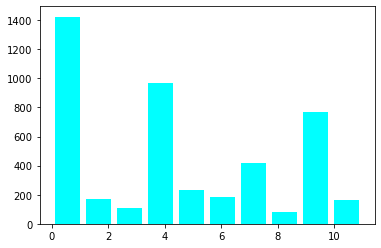

In [10]:
plt.hist(df['job'],histtype= 'bar', rwidth=0.8, color= 'cyan')
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

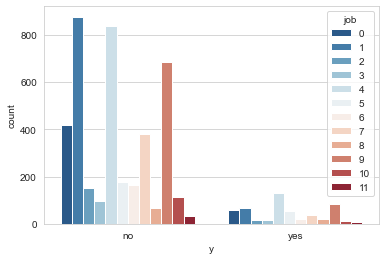

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='y',hue='job',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='marital', ylabel='count'>

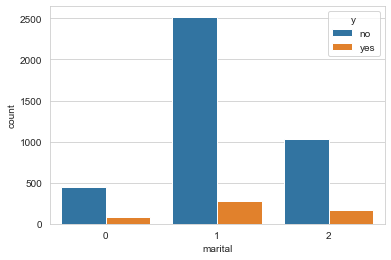

In [12]:
sns.countplot(x='marital',data=df,hue='y')

# RANDOM FOREST

In [13]:
X = df.drop('y', axis=1)
y= df['y']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
model.score(X_test,y_test)

0.8833780160857909

In [17]:
y_pred=model.predict(X_test)


In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[1272,   34],
       [ 140,   46]], dtype=int64)

In [19]:
f1_score(y_test, y_pred, average='macro')

0.6409235008049926

In [20]:
metrics.classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          no       0.90      0.97      0.94      1306\n         yes       0.57      0.25      0.35       186\n\n    accuracy                           0.88      1492\n   macro avg       0.74      0.61      0.64      1492\nweighted avg       0.86      0.88      0.86      1492\n'

Text(70.0, 0.5, 'Predicted value')

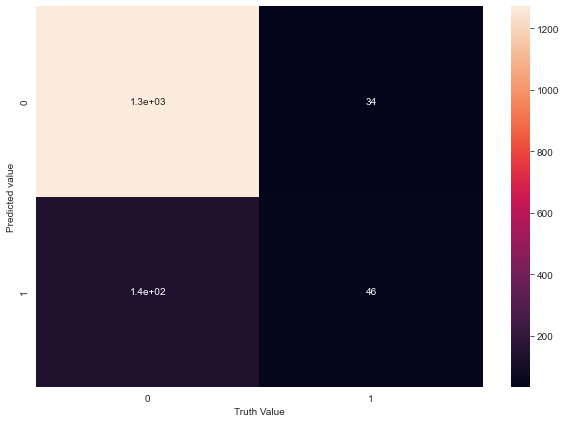

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth Value')
plt.ylabel('Predicted value')

# LOGESTIC REGRESSION

In [22]:
model = LogisticRegression()
model.fit(X_test,y_test)

C:\Users\MSI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
model.score(X_test,y_test)

0.8746648793565683

In [24]:
prediction = model.predict(X_test)
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [25]:
clas = classification_report(y_test,prediction)
clas

'              precision    recall  f1-score   support\n\n          no       0.89      0.97      0.93      1306\n         yes       0.49      0.18      0.26       186\n\n    accuracy                           0.87      1492\n   macro avg       0.69      0.58      0.60      1492\nweighted avg       0.84      0.87      0.85      1492\n'

In [26]:
conf = confusion_matrix(y_test,prediction)
print(conf)

[[1272   34]
 [ 153   33]]


Text(70.0, 0.5, 'Predicted value')

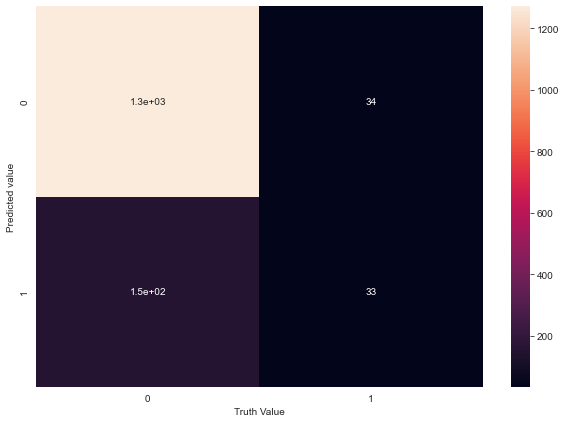

In [27]:
plt.figure(figsize=(10,7))
sns.heatmap(conf,annot=True)
plt.xlabel('Truth Value')
plt.ylabel('Predicted value')

In [28]:
acc= accuracy_score(y_test,prediction)
print(acc)

0.8746648793565683
